In [2]:
import pandas as pd
import numpy as np 
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
import collections
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix


C:\Users\jeka1\Anaconda2\envs\py36\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [3]:
genotypes = pd.read_csv("Table_genotypes.csv")
cortical_thickness = pd.read_csv("cortical_thickness_by_subject.csv")

In [3]:
genotypes.head()

,subject_id,sex,age,apoe,bin1,clu,abca7,cr1,picalm
0,s_001,M,70,E3/E4,A/G,C/C,T/T,G/G,C/T
1,s_002,F,64,E2/E3,A/G,C/C,T/T,G/G,T/T
2,s_003,F,60,E3/E3,A/G,C/C,G/T,A/G,C/T
3,s_004,M,70,E2/E3,A/G,C/C,T/T,G/G,C/T
4,s_005,M,68,E3/E3,A/G,C/T,T/T,G/G,C/C


In [4]:
cortical_thickness.head()

,subject_id,left_G_and_S_frontomargin,left_G_and_S_occipital_inf,left_G_and_S_paracentral,left_G_and_S_subcentral,left_G_and_S_transv_frontopol,left_G_and_S_cingul.Ant,left_G_and_S_cingul.Mid.Ant,left_G_and_S_cingul.Mid.Post,left_G_cingul.Post.dorsal,...,right_S_parieto_occipital,right_S_pericallosal,right_S_postcentral,right_S_precentral.inf.part,right_S_precentral.sup.part,right_S_suborbital,right_S_subparietal,right_S_temporal_inf,right_S_temporal_sup,right_S_temporal_transverse
0,s_001,1.805,1.866,1.772,2.449,1.970,2.039,2.551,2.251,2.891,...,1.520,1.661,1.449,1.930,1.733,2.247,1.952,2.442,2.065,1.399
1,s_002,2.201,2.151,1.922,2.447,2.263,2.587,2.524,2.153,2.621,...,1.644,2.059,1.838,2.270,1.835,2.448,2.167,2.541,2.399,2.713
2,s_003,2.012,1.813,1.724,2.131,2.225,2.572,2.525,2.349,2.738,...,1.643,2.159,1.792,1.824,1.801,2.499,1.873,2.254,2.180,1.865
3,s_004,2.203,1.765,2.142,2.659,2.331,2.335,2.422,2.383,2.834,...,1.781,2.115,1.723,2.031,1.530,2.431,1.987,2.418,2.404,2.451
4,s_005,2.118,2.013,1.582,2.062,2.233,2.541,2.652,2.526,2.885,...,2.026,1.781,1.700,2.228,2.011,2.690,2.333,2.864,2.273,1.779


Substitute categorical labels by numeric equivalent

In [4]:
def GetNumericEquivalent(df, gene):
    le = preprocessing.LabelEncoder()
    le.fit(df[gene])
    return le.transform(df[gene])

In [22]:
GetNumericEquivalent(genotypes, 'apoe')

array([2, 0, 1, 0, 1, 1, 1, 1, 1, 2, 1, 1, 1, 0, 2, 1, 1, 1, 1, 1, 2, 1, 1,
       3, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 2, 2, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 2, 0, 1, 1, 2, 1, 1, 2, 1, 1,
       2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 0, 1, 2, 1, 1, 1, 1,
       1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 2, 3, 2, 2, 1, 2, 1, 1, 2, 1, 0, 0, 1,
       1, 1, 2, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 0, 1, 1, 2, 1, 2, 1, 2,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2], dtype=int64)

In [5]:
genotypes_coded = pd.DataFrame({'subject_id':genotypes.subject_id,'apoe':GetNumericEquivalent(genotypes, 'apoe'),
             'bin1':GetNumericEquivalent(genotypes, 'bin1'), 'clu':GetNumericEquivalent(genotypes, 'clu'),
             'abca7':GetNumericEquivalent(genotypes, 'abca7'), 'cr1':GetNumericEquivalent(genotypes, 'cr1'),
             'picalm':GetNumericEquivalent(genotypes, 'picalm')})
genotypes_coded.head()

,subject_id,apoe,bin1,clu,abca7,cr1,picalm
0,s_001,2,1,0,2,2,1
1,s_002,0,1,0,2,2,2
2,s_003,1,1,0,1,1,1
3,s_004,0,1,0,2,2,1
4,s_005,1,1,1,2,2,0


In [6]:
full_df = pd.concat([cortical_thickness, genotypes_coded], axis=1, join='inner')
full_df.head()

,subject_id,left_G_and_S_frontomargin,left_G_and_S_occipital_inf,left_G_and_S_paracentral,left_G_and_S_subcentral,left_G_and_S_transv_frontopol,left_G_and_S_cingul.Ant,left_G_and_S_cingul.Mid.Ant,left_G_and_S_cingul.Mid.Post,left_G_cingul.Post.dorsal,...,right_S_temporal_inf,right_S_temporal_sup,right_S_temporal_transverse,subject_id,apoe,bin1,clu,abca7,cr1,picalm
0,s_001,1.805,1.866,1.772,2.449,1.970,2.039,2.551,2.251,2.891,...,2.442,2.065,1.399,s_001,2,1,0,2,2,1
1,s_002,2.201,2.151,1.922,2.447,2.263,2.587,2.524,2.153,2.621,...,2.541,2.399,2.713,s_002,0,1,0,2,2,2
2,s_003,2.012,1.813,1.724,2.131,2.225,2.572,2.525,2.349,2.738,...,2.254,2.180,1.865,s_003,1,1,0,1,1,1
3,s_004,2.203,1.765,2.142,2.659,2.331,2.335,2.422,2.383,2.834,...,2.418,2.404,2.451,s_004,0,1,0,2,2,1
4,s_005,2.118,2.013,1.582,2.062,2.233,2.541,2.652,2.526,2.885,...,2.864,2.273,1.779,s_005,1,1,1,2,2,0


In [67]:
print(collections.Counter(full_df.apoe))
print(collections.Counter(full_df.bin1))
print(collections.Counter(full_df.clu))
print(collections.Counter(full_df.abca7))
print(collections.Counter(full_df.cr1))
print(collections.Counter(full_df.picalm))

Counter({1: 105, 2: 35, 0: 16, 3: 3})
Counter({0: 78, 1: 70, 2: 11})
Counter({1: 76, 0: 65, 2: 18})
Counter({2: 117, 1: 39, 0: 3})
Counter({2: 95, 1: 59, 0: 5})
Counter({1: 84, 0: 61, 2: 14})


I picked up the brain area with highest correlation (median with all areas ~0.4-0.5 and 25% of all correlations ~0.6), code in r

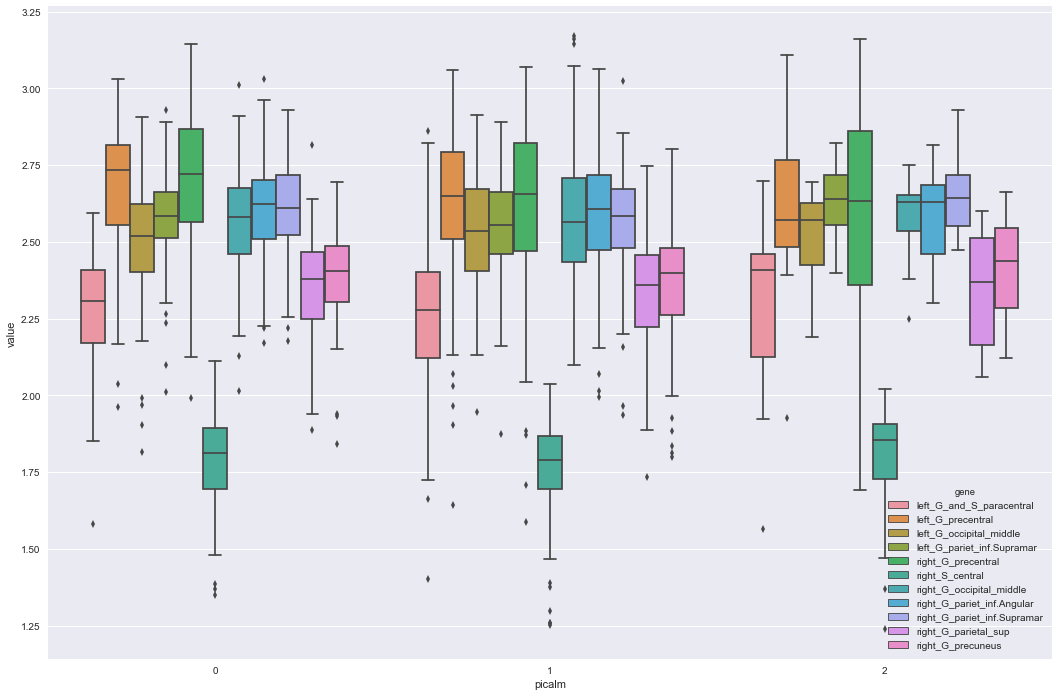

In [68]:
sns.set(rc={'figure.figsize':(18,12)})

dd=pd.melt(full_df,id_vars=['picalm'],value_vars=["left_G_and_S_paracentral", "left_G_precentral", 
'left_G_occipital_middle', 'left_G_pariet_inf.Supramar', "right_G_precentral", "right_S_central", 'right_G_occipital_middle',
'right_G_pariet_inf.Angular', 'right_G_pariet_inf.Supramar', 'right_G_parietal_sup', 'right_G_precuneus'],var_name='gene')
sns.boxplot(x='picalm',y='value',data=dd,hue='gene')


No anomaly in distributions was detected through all genes

In [7]:
X_train, X_test, y_train, y_test = train_test_split(full_df.loc[:, 'apoe':'bin1'], full_df['left_G_subcallosal'], test_size = 0.3)

RF = RandomForestRegressor(max_depth = 5, random_state=0)
RF.fit(X_train, y_train)
pred = RF.predict(X_test)

print(r2_score(y_test, pred))
print(RF.feature_importances_)

-0.20893601523409533
[0.53855733 0.46144267]


In [134]:
r2_all_areas = []
for i in range(1,149):
    r2_all_areas.append(cross_val_score(RF, full_df.loc[:, 'apoe':'picalm'], full_df[list(cortical_thickness)[i]], cv=5, scoring = 'r2'))

for all brain area random forest regressor works poorly, as r2_score always is negative which means that our model does not fit our data

even if we perform cross validation to optimise the RF parameter max_depth results are still bad

In [151]:
from sklearn.model_selection import GridSearchCV
#parameters = {'max_depth':[3, 5, 7, 9]}
for i in range(1,149):
    RF = RandomForestRegressor()
    clf = GridSearchCV(RF, {'max_depth':[3, 5, 7, 9]}, cv=5,scoring = 'r2')
    clf.fit(full_df.loc[:, 'apoe':'picalm'], full_df[list(cortical_thickness)[i]])
    print(list(cortical_thickness)[i])
    print(clf.best_score_)  
    print(clf.best_estimator_.max_depth)

left_G_and_S_frontomargin
-0.14137387078
3
left_G_and_S_occipital_inf
-0.36828657319
3
left_G_and_S_paracentral
-0.825059666118
3
left_G_and_S_subcentral
-0.122302311696
3
left_G_and_S_transv_frontopol
-0.379304605679
3
left_G_and_S_cingul.Ant
-0.0600654886817
3
left_G_and_S_cingul.Mid.Ant
-0.133683425758
3
left_G_and_S_cingul.Mid.Post
-0.208058065926
3
left_G_cingul.Post.dorsal
-0.0687602716284
5
left_G_cingul.Post.ventral
-0.126963574681
3
left_G_cuneus
-1.28691695333
3
left_G_front_inf.Opercular
-0.571199029903
3
left_G_front_inf.Orbital
-0.310155898543
3
left_G_front_inf.Triangul
-0.3463644885
3
left_G_front_middle
-0.282572000636
3
left_G_front_sup
-0.111497240497
3
left_G_Ins_lg_and_S_cent_ins
-0.107740716051
3
left_G_insular_short
-0.503027004064
3
left_G_occipital_middle
-0.499568868958
3
left_G_occipital_sup
-0.962805131013
3
left_G_oc.temp_lat.fusifor
-0.446937534793
3
left_G_oc.temp_med.Lingual
-0.876994777618
5
left_G_oc.temp_med.Parahip
-0.282031090517
3
left_G_orbital
-0.

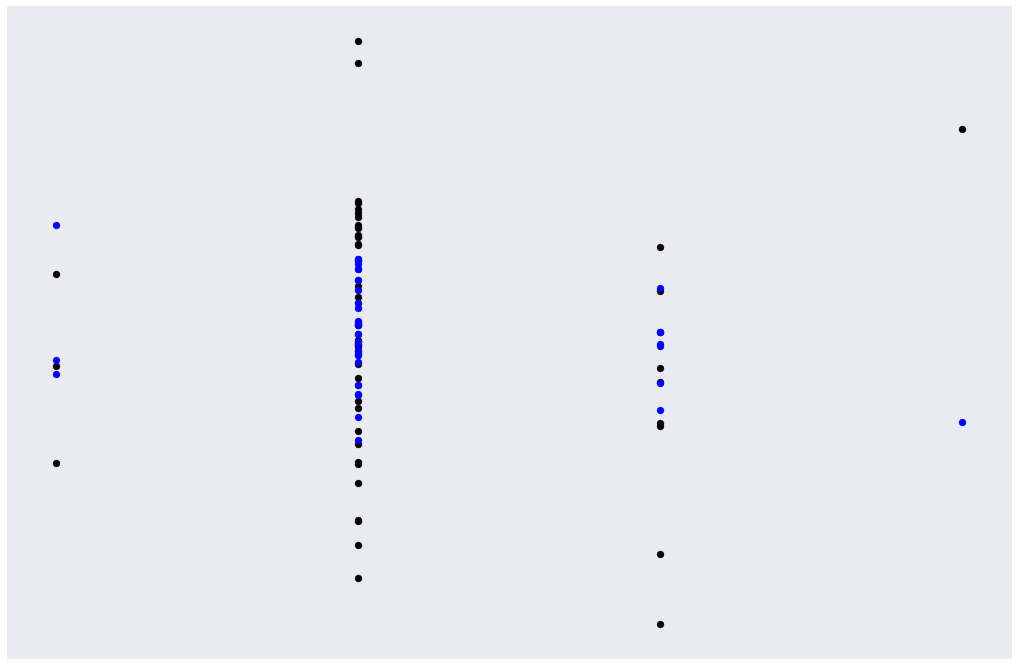

In [90]:
# Plot outputs
plt.scatter(X_test.apoe, y_test,  color='black')
plt.scatter(X_test.apoe, pred, color='blue')

plt.xticks(())
plt.yticks(())

plt.show()